In [1]:
  pip install netCDF4


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.6 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import netCDF4
import matplotlib.pyplot as plt
file_path = '/content/drive/MyDrive/Data/VNP03MOD_NRT.A2023329.0512.002.2023329062910.nc'
file_nc = netCDF4.Dataset(file_path)

In [4]:
file_nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: VIIRS M-band Geolocation Data
    instrument: VIIRS
    product_name: VNP03MOD_NRT.A2023329.0512.002.2023329062910.nc
    LocalGranuleID: VNP03MOD_NRT.A2023329.0512.002.2023329062910.nc
    date_created: 2023-11-25T01:34:46Z
    ProductionTime: 2023-11-25T01:34:46Z
    processing_version: v3.0.0
    Conventions: CF-1.6
    institution: NASA Goddard Space Flight Center, VIIRS L1 Processing Group
    license: http://science.nasa.gov/earth-science/earth-science-data/data-information-policy/
    naming_authority: gov.nasa.gsfc.VIIRSland
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Science Keywords
    standard_name_vocabulary: 
    creator_name: VIIRS L1 Processing Group
    creator_email: modis-ops@lists.nasa.gov
    creator_url: https://ladsweb.modaps.eosdis.nasa.gov
    project: VIIRS L1 Project
    publisher_name: LAADS
    publisher_url: https://ladsweb.modaps.eosdis

In [5]:
type(file_nc.groups)

dict

In [6]:
len(file_nc.groups)

3

In [7]:
scan = file_nc.groups['scan_line_attributes']

In [8]:
scan

<class 'netCDF4._netCDF4.Group'>
group /scan_line_attributes:
    dimensions(sizes): 
    variables(dimensions): float64 scan_start_time(number_of_scans), float64 scan_end_time(number_of_scans), float64 ev_mid_time(number_of_scans), uint8 HAM_side(number_of_scans), uint8 sensor_mode(number_of_scans), int16 scan_quality(number_of_scans)
    groups: 

In [12]:
image = file_nc.groups['geolocation_data']

In [13]:
image

<class 'netCDF4._netCDF4.Group'>
group /geolocation_data:
    dimensions(sizes): 
    variables(dimensions): float32 latitude(number_of_lines, number_of_pixels), float32 longitude(number_of_lines, number_of_pixels), int16 height(number_of_lines, number_of_pixels), int16 range(number_of_lines, number_of_pixels), int16 sensor_azimuth(number_of_lines, number_of_pixels), int16 sensor_zenith(number_of_lines, number_of_pixels), int16 solar_azimuth(number_of_lines, number_of_pixels), int16 solar_zenith(number_of_lines, number_of_pixels), uint8 land_water_mask(number_of_lines, number_of_pixels), uint8 water_present(number_of_lines, number_of_pixels), uint8 quality_flag(number_of_lines, number_of_pixels)
    groups: 

In [15]:
image['land_water_mask'][:]

masked_array(
  data=[[7, 7, 7, ..., 0, 0, 0],
        [7, 7, 7, ..., 0, 0, 0],
        [7, 7, 7, ..., 0, 0, 0],
        ...,
        [7, 7, 7, ..., 1, 1, 1],
        [7, 7, 7, ..., 1, 1, 1],
        [7, 7, 7, ..., 1, 1, 1]],
  mask=False,
  fill_value=999999,
  dtype=uint8)

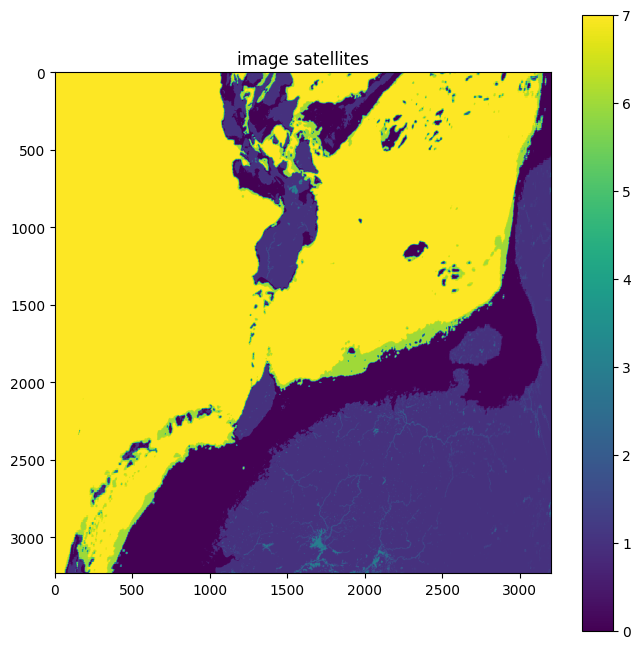

In [17]:
plt.figure(figsize=(8, 8))  # Kích thước của hình vẽ, có thể điều chỉnh tùy ý
image_data = image['land_water_mask'][:]

# Hiển thị ảnh sử dụng matplotlib
plt.imshow(image_data, cmap='viridis')  # Chọn một colormap phù hợp với dữ liệu của bạn
plt.title('image satellites')
plt.colorbar()  # Thêm thanh màu để hiển thị giá trị của pixel
plt.show()

# Đóng file NetCDF khi bạn đã xong


application using algorithms PCA in image satellites  


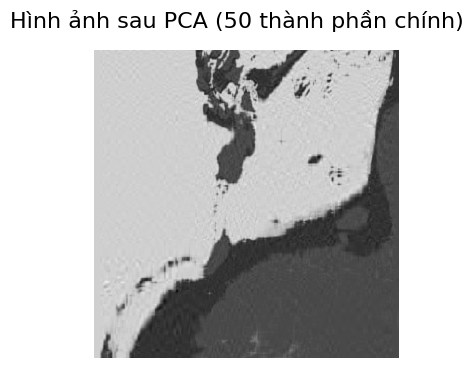

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
n_components = 50  # Chọn số thành phần chính mong muốn
pca = PCA(n_components=n_components)
X = image_data
X_pca = pca.fit_transform(X)

# Hiển thị hình ảnh sau PCA
plt.figure(figsize=(8, 4))
plt.suptitle(f'Hình ảnh sau PCA ({n_components} thành phần chính)', fontsize=16)

# plt.subplot(10, 30, i)
plt.imshow(pca.inverse_transform(X_pca[:]), cmap='gray')
plt.axis('off')

plt.show()